## Camera Projection Matrix

In [ ]:
import sys
from google.colab import drive
drive.mount('/content/drive')
sys.path.insert(0,'/content/drive/My Drive/Computer Vision/HW1')

(a) Write a function rotY() which takes an angle theta (in radian) and outputs the 3D rotation matrix of 
rotating by theta about the y-axis (right-hand rule). You may refer to this Wikipedia entry: https:
//en.wikipedia.org/wiki/Rotation matrix#Basic rotations After you are done, refer to the starter code to 
generate and submit cube.gif of a cube rotating around itself.

In [ ]:
from dolly_zoom import *
import os
import imageio
import math as m

def rotY(theta):
  return np.array([[ m.cos(theta), 0, m.sin(theta)],
                   [ 0           , 1, 0           ],
                   [-m.sin(theta), 0, m.cos(theta)]])

def rotX(theta):
  return np.array([[ 1, 0           , 0           ],
                   [ 0, m.cos(theta),-m.sin(theta)],
                   [ 0, m.sin(theta), m.cos(theta)]])


def generate_gif():
    n_frames = 30
    if not os.path.isdir("frames"):
        os.mkdir("/content/sample_data/frames")
    fstr = "/content/sample_data/frames/%d.png"
    for i,theta in enumerate(np.arange(0,2*np.pi,2*np.pi/n_frames)):
        fname = fstr % i
        renderCube(f=15, t=(0,0,3), R=rotY(theta))
        plt.savefig(fname)
        plt.close()

    with imageio.get_writer("/content/sample_data/cube.gif", mode='I') as writer:
        for i in range(n_frames):
            frame = plt.imread(fstr % i)
            writer.append_data(frame)
            os.remove(fstr%i)   
    os.rmdir("/content/sample_data/frames")

generate_gif()

(b) Combine rotX() and rotY(), choose an appropriate order and a pair of parameters so that renderCube() draws 
a projection of the cube where one diagonal of the cube is projected to a single point, as shown
in Figure 1 (left). Report the order and parameters you choose.

In [ ]:
fname = '/content/sample_data/rotY_X.png'
theta = np.pi/4
renderCube(f=15, t=(0,0,3), R=rotY(theta).dot(rotX(theta)))
plt.savefig(fname)
plt.close()

fname = '/content/sample_data/rotX_Y.png'
theta = np.pi/4
renderCube(f=15, t=(0,0,3), R=rotX(theta).dot(rotY(theta)))
plt.savefig(fname)
plt.close()

(c) Combine rotX() and rotY(), choose an appropriate order and a pair of parameters so that renderCube() draws 
a projection of the cube where one diagonal of the cube is projected to a single point, as shown
in Figure 1 (left). Report the order and parameters you choose.

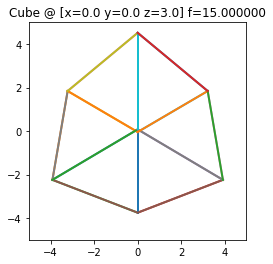

In [ ]:
fname = '/content/sample_data/rotDiagonal.png'
theta_x = np.pi/5
theta_y = np.pi/4
renderCube(f=15, t=(0,0,3), R=rotX(theta_x).dot(rotY(theta)))

(d) Implement an orthographic camera by either adding a branch to function projectLines(), or refer to it 
and write a new one. Then plot the same rotated cube in the previous part with this orthographic 
camera. It should look like Figure 1 (right).

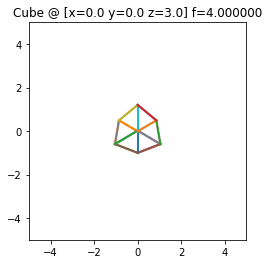

In [ ]:
fname = '/content/sample_data/rotDiagonal.png'
theta_x = np.pi/5
theta_y = np.pi/4
renderCube(f=4, t=(0,0,3), R=rotX(theta_x).dot(rotY(theta)))

## Prokudin-Gorskii: Color from grayscale photographs

**Task 1:** Combine (5 pts) We will provide you with a folder of Prokudin-Gorskii’s black-and-white 
(grayscale) image composites (prokudin-gorskii/ in the assignment zip). Each composite (alter- natively 
triple-framed image or triptych) contains three grayscale photos preserved from the early 1900s. The 
composite looks like a three panel vertical comic strip, with each grayscale photo in the composite 
positioned vertically above one another. These photos represent images captured with a blue, green, and
red filter. Choose a single composite from this folder (your favorite) and write a program in Python that 
takes the three grayscale panels and simply stacks them across the third color channel dimension to 
produce a single, colored image. We expect this stacked photo to look wonky and unaligned- fixing this is 
what you will do in Task 2. Make sure to save your images as RGB instead of BGR and include them in
your report.
Specifically: Write a function that loads a grayscale tripled-framed image from prokudin-gorskii/ with 
something like plt.imread(), chops it vertically into thirds, then saves a color image with each third as the 
correct color channel. Save the output colored image in your report.

(1024, 394)
1024 394
1024 394
993 355


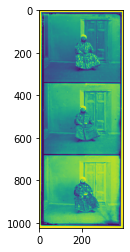

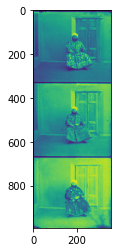

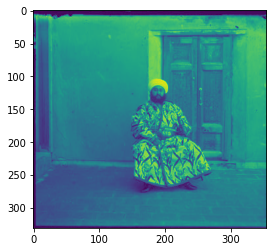

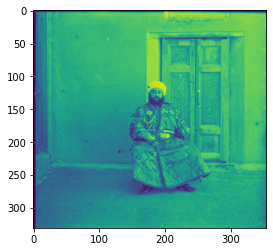

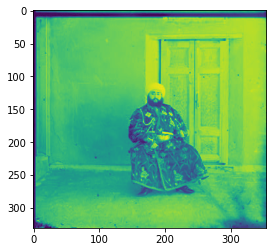

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageChops
import numpy as np

imname='/content/sample_data/00153v.jpg'
img=Image.open(imname)
img=np.asarray(img)
print(img.shape)
plt.imshow(img)

w,h=img.shape
print(w,h)
plt.figure()
plt.imshow(img)

w,h=img.shape
print(w,h)
img=img[int(w*0.01):int(w-w*0.02),int(h*0.05):int(h-h*0.05)]
w,h=img.shape
print(w,h)
plt.imshow(img)

w,h=img.shape
height=int(w/3)
blue=img[0:height,:]
green=img[height:2*height,:]
red=img[2*height:3*height,:]
plt.figure()
plt.imshow(blue)
plt.figure()
plt.imshow(green)
plt.figure()
plt.imshow(red)
cv2.imwrite('/content/sample_data/blue.png',blue)
cv2.imwrite('/content/sample_data/green.png',green)
cv2.imwrite('/content/sample_data/red.png',red)
c1 = (np.dstack((red,green,blue))).astype(np.uint8)
c=Image.fromarray(c1)
c.save('/content/sample_data/bgr.jpg')

**Task 2**: Alignment (25 pts) As you will have noticed, the photos are misaligned due to inadvertent 
jostling of the camera between each shot. Your second task is to fix this. You need to search over possible 
pixel offsets in the range of [-15, 15] to find the best alignment for the different R, G, and B channels.
The simplest way is to keep one channel fixed, say R, and align the G and B channels to it by searching 
over the offset range both horizontally and vertically. Pick the alignment that maximizes a similarity 
metric (of your choice) between the channels. One such measure is dot product, i.e, R G. Another is
normalized cross- correlation, which is simply the dot product between the L2 normalized R and G
vectors. After writing this function, run it on all of the images in prokudin-gorskii/ and also on ’efros 
tableau.jpg’, so Professor Efros can have his photo restored to color. Include these aligned images and the 
offsets in your report. For full credit, your report needs to include properly aligned images - find a 
similarity metric that will accomplish this.

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageChops
import numpy as np

imname='/content/sample_data/efros_tableau.jpg'
img=Image.open(imname)
img=np.asarray(img)
print(img.shape)
plt.imshow(img)

w,h=img.shape
print(w,h)
plt.figure()
plt.imshow(img)

w,h=img.shape
print(w,h)
img=img[int(w*0.01):int(w-w*0.02),int(h*0.05):int(h-h*0.05)]
w,h=img.shape
print(w,h)
plt.imshow(img)

w,h=img.shape
height=int(w/3)
blue=img[0:height,:]
green=img[height:2*height,:]
red=img[2*height:3*height,:]
plt.figure()
plt.imshow(blue)
plt.figure()
plt.imshow(green)
plt.figure()
plt.imshow(red)

c1 = (np.dstack((red,green,blue))).astype(np.uint8)
c=Image.fromarray(c1)
c.save('/content/sample_data/new1.jpg')

def norm_cc(a,b):
    a=a-a.mean(axis=0)
    b=b-b.mean(axis=0)
    return np.sum(((a/np.linalg.norm(a)) * (b/np.linalg.norm(b))))

def align_ncc(a, b, t):
    min_norm_cc = -1
    iv=np.linspace(-t,t,2*t,dtype=int)
    jv=np.linspace(-t,t,2*t,dtype=int)
    for i in iv:
        for j in jv:
            diff = norm_cc(a,np.roll(b,[i,j],axis=(0,1)))
            if diff > min_norm_cc:
                min_norm_cc = diff
                output = [i,j]
    return output

alignGB = align_ncc(blue,green,20)
alignRB = align_ncc(blue,red,20)
print('Offsets (keeping B constant):',alignGB, alignRB)
g=np.roll(green,alignGB,axis=(0,1))
r=np.roll(red,alignRB,axis=(0,1))
coloured = (np.dstack((r,g,blue))).astype(np.uint8)
coloured=coloured[int(coloured.shape[0]*0.05):int(coloured.shape[0]-coloured.shape[0]*0.05),int(coloured.shape[1]*0.05):int(coloured.shape[1]-coloured.shape[1]*0.05)]
coloured = Image.fromarray(coloured)
coloured.save('/content/sample_data/new.jpg')
plt.figure()
plt.imshow(coloured)

**Task 3**: Pyramid (20 pts) For very large offsets (and high-resolution images), comparing all the alignments for a broad range of displacements (e.g. [-30, 30]) can be computationally intensive. We will have 
you implement a recursive version of your algorithm that starts by estimating an image’s alignment on a 
low-resolution version of itself, before refining it on higher resolutions. To implement this, you will build 
a two-level image pyramid. To do this, you must first scale the triple-frame images down by a factor of 2 
(both the width and height should end up halved). Starting with your shrunk, coarse images, execute your 
alignment from Task 2 over the following range of offsets [-15, 15]. Choose the best alignment based on 
your similarity metric and treat it as the new current alignment. Then in the full resolution images, use 
this new current alignment as a starting place to again run the alignment from Task 2 in a small range [-
15, 15]. Run this Pyramid task on the ’seoul tableau.jpg’ and ’vancouver tableau.jpg’ images. If your 
course project goes well

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageChops
import numpy as np

imname='/content/sample_data/vancouver_tableau.jpg'
img=Image.open(imname)
img=np.asarray(img)
print(img.shape)
plt.imshow(img)

w,h=img.shape
print(w,h)
plt.figure()
plt.imshow(img)

w,h=img.shape
print(w,h)
img=img[int(w*0.01):int(w-w*0.02),int(h*0.05):int(h-h*0.05)]
w,h=img.shape
print(w,h)
plt.imshow(img)

w,h=img.shape
height=int(w/3)
blue=img[0:height,:]
green=img[height:2*height,:]
red=img[2*height:3*height,:]
plt.figure()
plt.imshow(blue)
plt.figure()
plt.imshow(green)
plt.figure()
plt.imshow(red)

c1 = (np.dstack((red,green,blue))).astype(np.uint8)
c=Image.fromarray(c1)
c.save('/content/sample_data/new1.jpg')

def norm_cc(a,b):
    a=a-a.mean(axis=0)
    b=b-b.mean(axis=0)
    return np.sum(((a/np.linalg.norm(a)) * (b/np.linalg.norm(b))))

def align_ncc(a, b, t):
    min_norm_cc = -1
    iv=np.linspace(-t,t,2*t,dtype=int)
    jv=np.linspace(-t,t,2*t,dtype=int)
    for i in iv:
        for j in jv:
            diff = norm_cc(a,np.roll(b,[i,j],axis=(0,1)))
            if diff > min_norm_cc:
                min_norm_cc = diff
                output = [i,j]
    return output

alignGB = align_ncc(blue,green,20)
alignRB = align_ncc(blue,red,20)
print('Offsets (keeping B constant):',alignGB, alignRB)
g=np.roll(green,alignGB,axis=(0,1))
r=np.roll(red,alignRB,axis=(0,1))
coloured = (np.dstack((r,g,blue))).astype(np.uint8)
coloured=coloured[int(coloured.shape[0]*0.05):int(coloured.shape[0]-coloured.shape[0]*0.05),int(coloured.shape[1]*0.05):int(coloured.shape[1]-coloured.shape[1]*0.05)]
coloured = Image.fromarray(coloured)
coloured.save('/content/sample_data/new.jpg')
plt.figure()
plt.imshow(coloured)

## Color Space and Illuminance

Load the images and plot their R, G, B channels separately as grayscale images using plt.imshow() (beware of 
normalization). Then convert them into LAB color space using cv2.cvtColor() and plot the three channels again. Include the 
plots in your report.

RGB-Indoor

In [ ]:
import skimage.io as io
import matplotlib.pyplot as plt
img = io.imread('/content/sample_data/indoor.png')
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]
cv2.imwrite('/content/sample_data/blue.png',blue)
cv2.imwrite('/content/sample_data/green.png',green)
cv2.imwrite('/content/sample_data/red.png',red)

RGB-Outdoor

In [ ]:
import skimage.io as io
import cv2
import matplotlib.pyplot as plt
img = io.imread('/content/sample_data/outdoor.png')
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]
cv2.imwrite('/content/sample_data/blue.png',blue)
cv2.imwrite('/content/sample_data/green.png',green)
cv2.imwrite('/content/sample_data/red.png',red)

LAB-Indoor

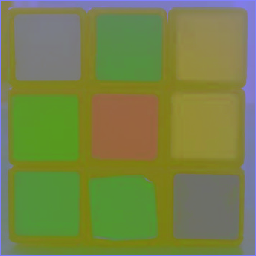

"\ncv2.imwrite('/content/sample_data/blue1.png',l_channel)\ncv2.imwrite('/content/sample_data/green1.png',a_channel)\ncv2.imwrite('/content/sample_data/red1.png',b_channel)"

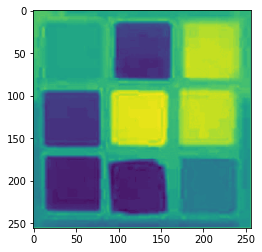

In [ ]:
import cv2
import numpy as np
import sys
import urllib
import skimage.io as io
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
image = io.imread('/content/sample_data/indoor.png')
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
cv2.imwrite('/content/sample_data/lab.png',lab_image)
l_channel,a_channel,b_channel = cv2.split(lab_image)
cv2_imshow(lab_image)
plt.imshow(l_channel)
plt.imshow(a_channel)
plt.imshow(b_channel)
cv2.imwrite('/content/sample_data/blue1.png',l_channel)
cv2.imwrite('/content/sample_data/green1.png',a_channel)
cv2.imwrite('/content/sample_data/red1.png',b_channel)

LAB-Outdoor

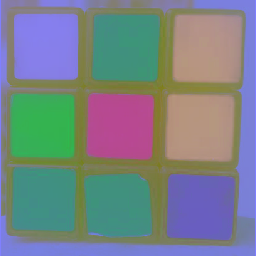

True

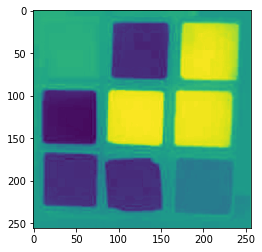

In [ ]:
import cv2
import numpy as np
import sys
import urllib
import skimage.io as io
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
image = io.imread('/content/sample_data/outdoor.png')
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
cv2.imwrite('/content/sample_data/lab.png',lab_image)
l_channel,a_channel,b_channel = cv2.split(lab_image)
cv2_imshow(lab_image)
plt.imshow(l_channel)
plt.imshow(a_channel)
plt.imshow(b_channel)
cv2.imwrite('/content/sample_data/blue1.png',l_channel)
cv2.imwrite('/content/sample_data/green1.png',a_channel)
cv2.imwrite('/content/sample_data/red1.png',b_channel)

In [ ]:
import cv2
import numpy as np
import sys
import urllib
import skimage.io as io
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
image = io.imread('/content/sample_data/IMG_1.png')
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
cv2.imwrite('/content/sample_data/lab.png',lab_image)
l_channel,a_channel,b_channel = cv2.split(lab_image)
cv2_imshow(lab_image)

(c) Choose two different lighting conditions and take two photos of a non-specular object. Try to make the same color look 
as different as possible (a large distance on AB plane in LAB space). Below is an example of two photos of the same piece of paper, taken in the basement and by the window respectively.

In [ ]:
import cv2
import numpy as np
import sys
import urllib
import skimage.io as io
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

image1 = io.imread('/content/sample_data/IMG_1.png')
lab_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2LAB)
cv2.imwrite('/content/sample_data/lab1.png',lab_image1)
l_channel1,a_channel1,b_channel1 = cv2.split(lab_image1)

image2 = io.imread('/content/sample_data/IMG_2.png')
lab_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2LAB)
cv2.imwrite('/content/sample_data/lab2.png',lab_image2)
l_channel2,a_channel2,b_channel2 = cv2.split(lab_image2)

True

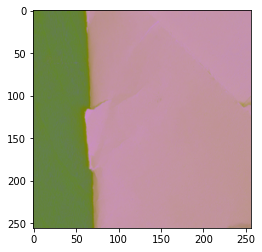

In [ ]:
from PIL import Image
im=Image.open('/content/sample_data/lab1.png')
w,h=im.size
left=4
top=h/5
right=1544
bottom=3*h/5
im1=im.crop((left,top,right,bottom))
newsize=(256,256)
im1=im1.resize(newsize)
plt.imshow(im1)
cv2.imwrite('/content/sample_data/lab1_resize.png',lab_image2)

True

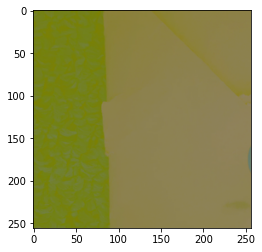

In [ ]:
from PIL import Image
im=Image.open('/content/sample_data/lab2.png')
w,h=im.size
left=4
top=h/5
right=1544
bottom=3*h/5
im1=im.crop((left,top,right,bottom))
newsize=(256,256)
im1=im1.resize(newsize)
plt.imshow(im1)
cv2.imwrite('/content/sample_data/lab2_resize.png',lab_image2)